In [1]:
import matplotlib

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from random import random
from scipy.spatial import Voronoi

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
matplotlib.rcParams["figure.figsize"] = (16, 7)

In [5]:
def random_planar_graph(n, prob=1):
    points = np.random.rand(n,2)
    # we get the voronoi diagram
    vor = Voronoi(points)

    G = nx.Graph()

    # Add an edge for each ridge in the Voronoi diagram that connects two points in the range [0,1]
    for simplex in vor.ridge_vertices:
        if -1 not in simplex:
            i, j = simplex
            p = vor.vertices[i]
            q = vor.vertices[j]
            if 0 <= p[0] <= 1 and \
                    0 <= p[1] <= 1 and \
                    0 <= q[0] <= 1 and \
                    0 <= q[1] <= 1 and \
                    random() <= prob:
                distance = np.linalg.norm(p - q) # Calculate the Euclidean distance between p and q
                G.add_edge(tuple(p), tuple(q),weight=distance)

    return G

In [36]:
def draw(G, measures, measure_name):
    pos = nx.spring_layout(G, seed=40)

    fig, ax  = plt.subplots(ncols=2)


    nodes = nx.draw_networkx_nodes(G, pos, node_size=100,
                                   ax=ax[0])
    nx.draw_networkx_edges(G, pos, ax=ax[0])

    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(),
                                   ax=ax[1])
    # nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    nx.draw_networkx_edges(G, pos, ax=ax[1])

    fig.suptitle(measure_name, fontsize=24)
    fig.colorbar(nodes)
    ax[0].set_title('Karate club graph')
    ax[1].set_title('Nodes centrality')
    ax[0].axis('off')
    ax[1].axis('off')

In [37]:
G = nx.karate_club_graph()

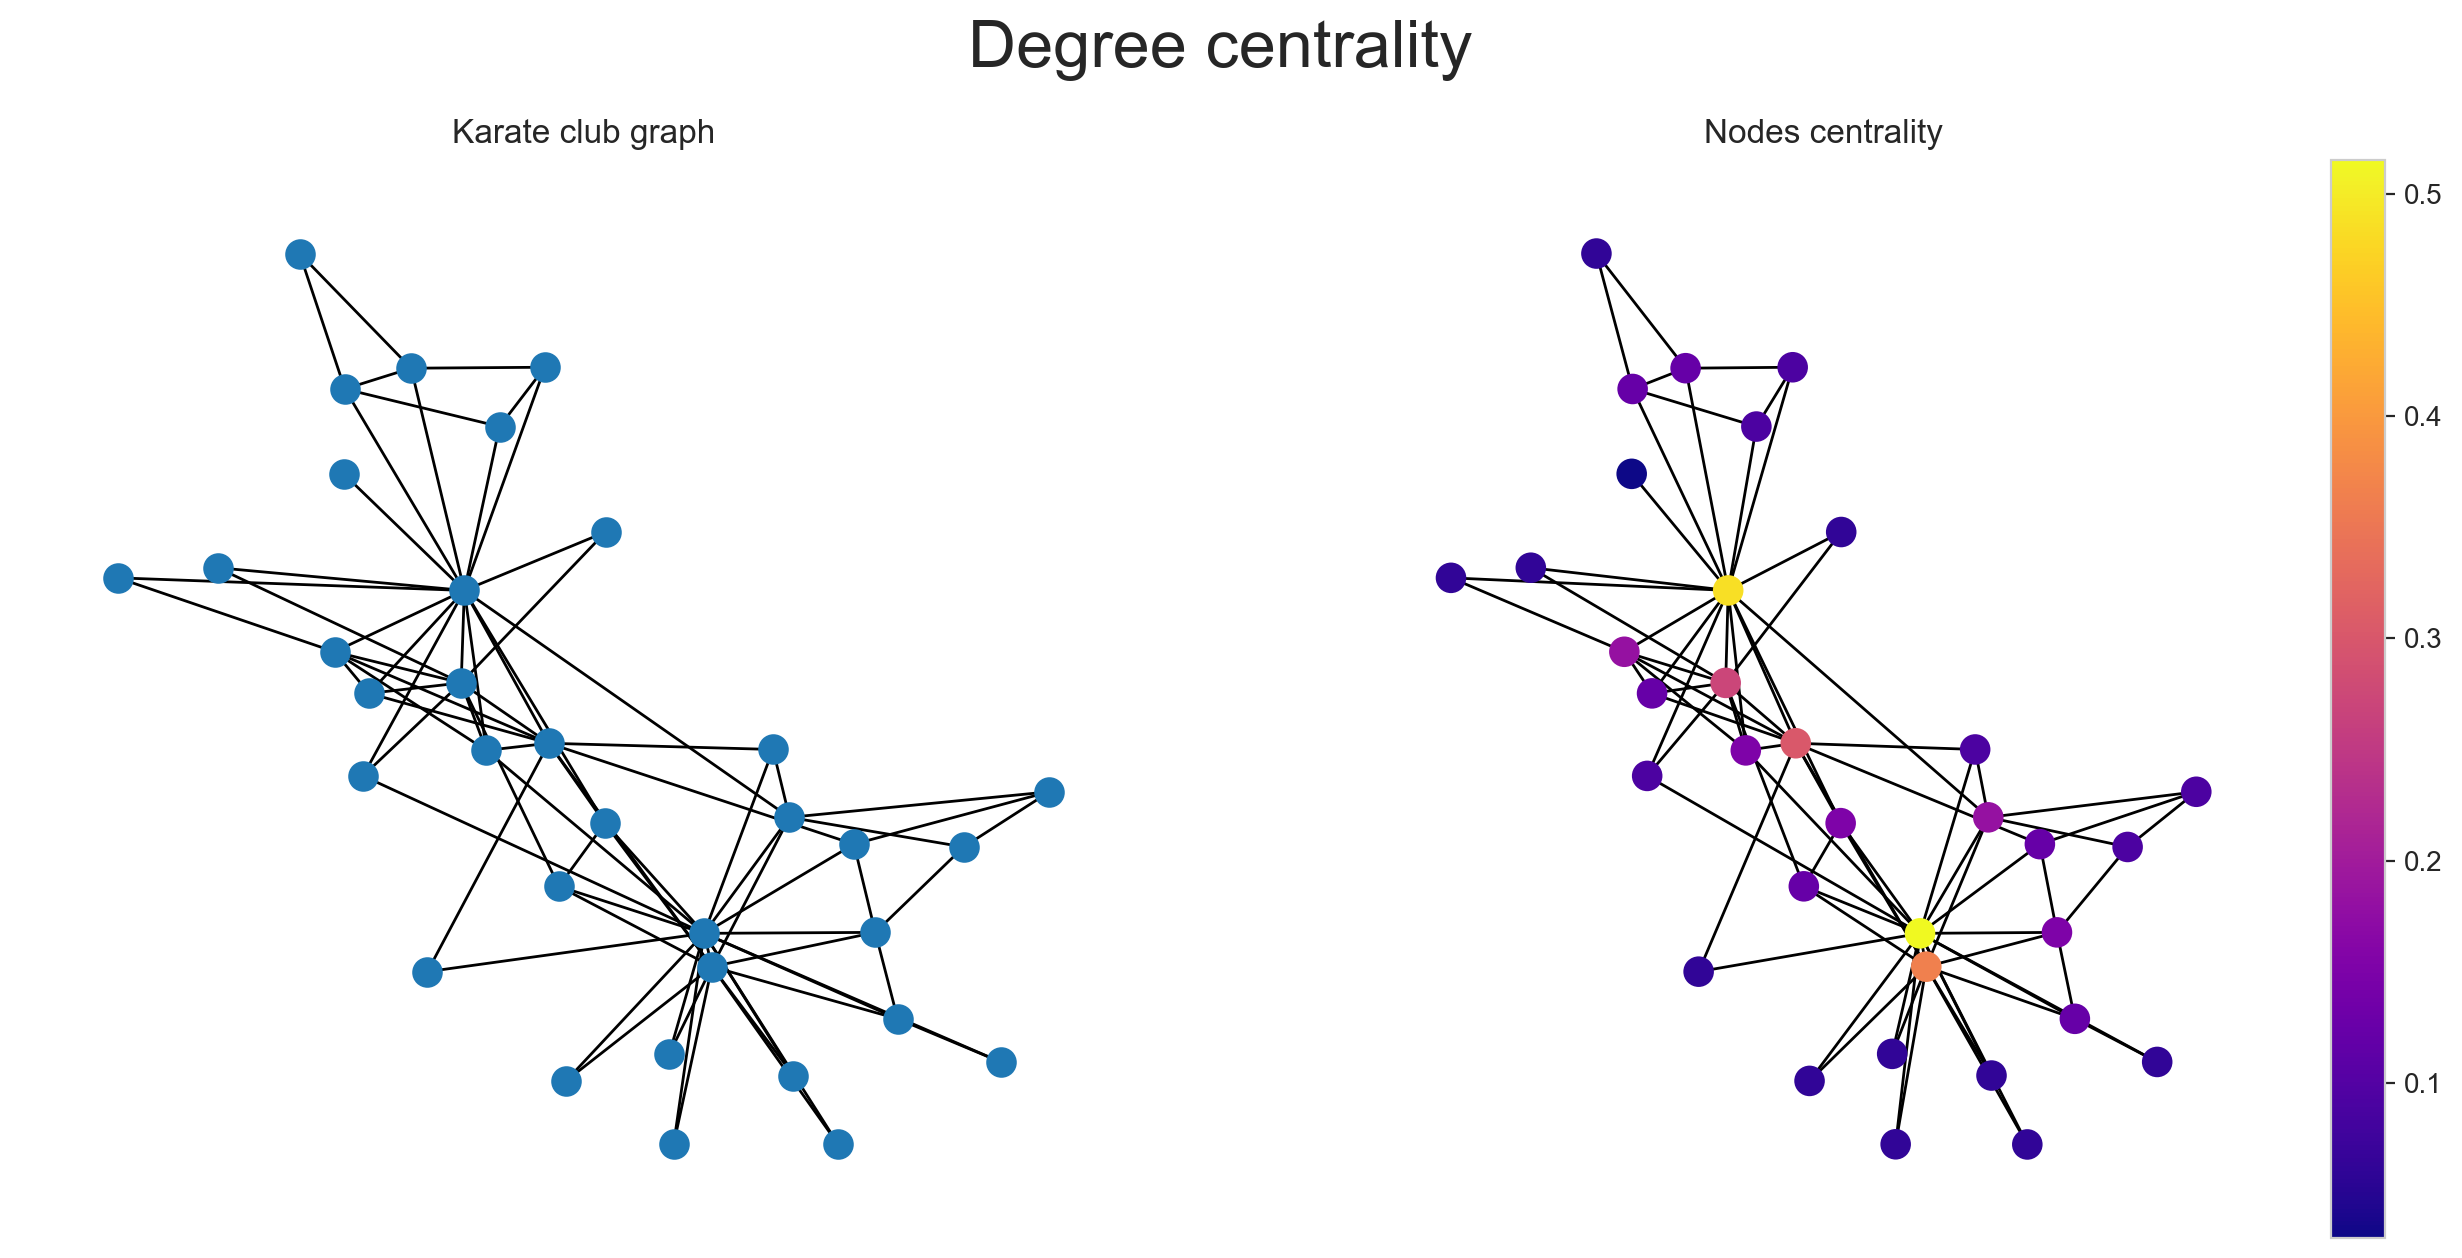

In [43]:
# G = random_planar_graph(50, prob=0.7)

degree_centrality = nx.degree_centrality(G)
draw(G, degree_centrality, 'Degree centrality')
plt.savefig('figures/degree-centrality.png', dpi=300)

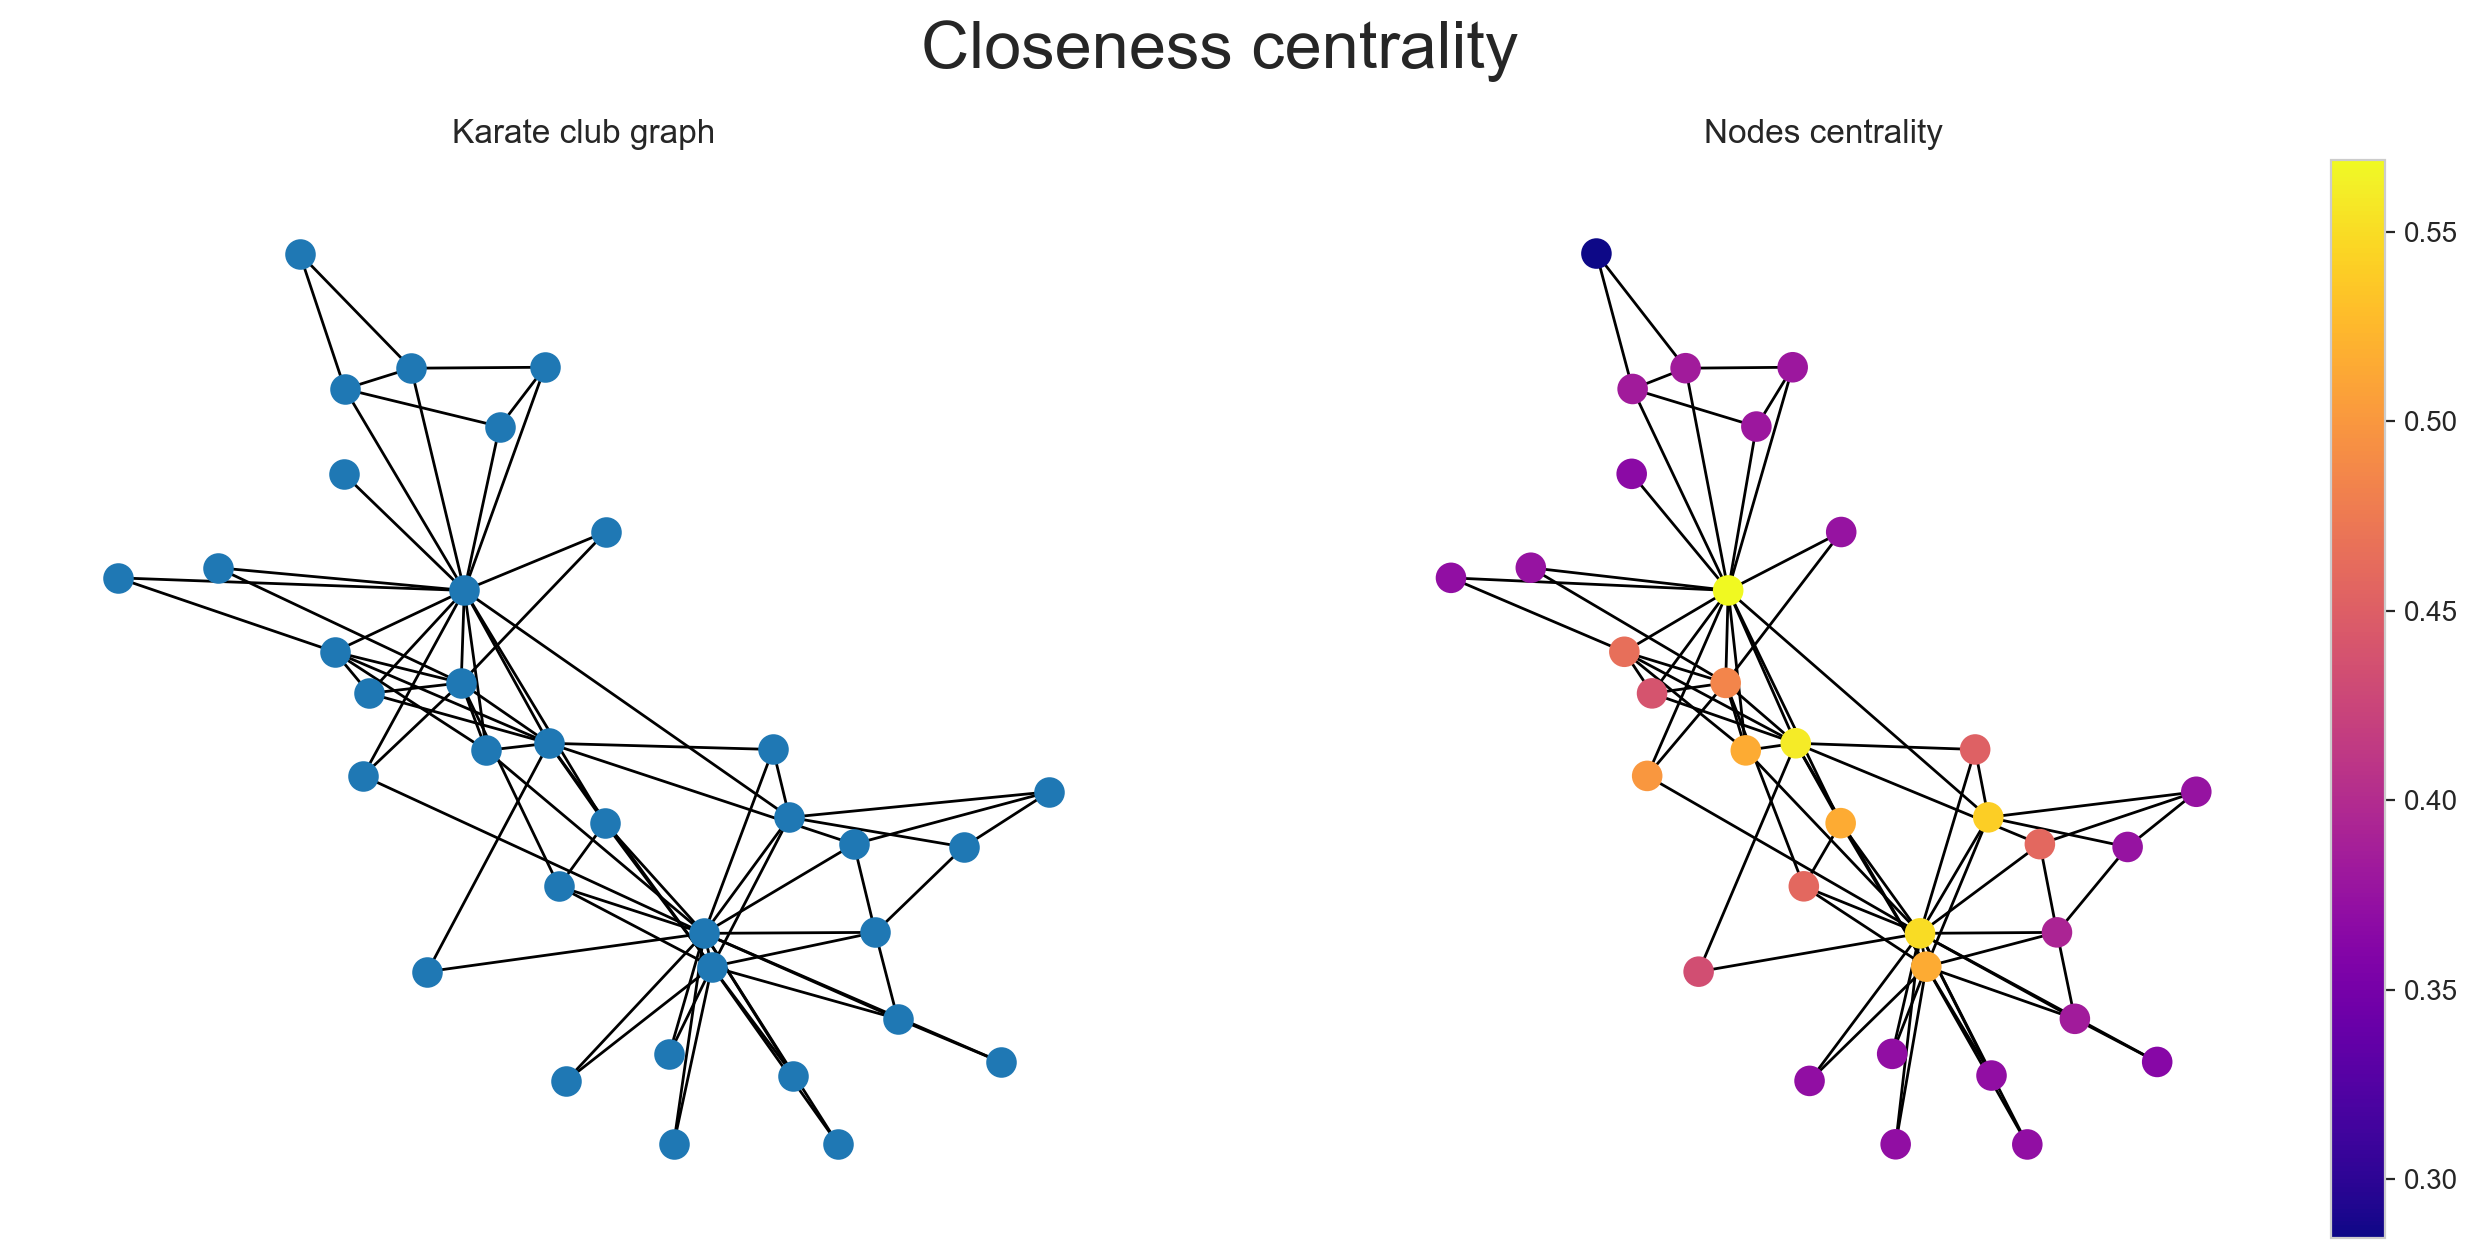

In [44]:
closeness_centrality = nx.closeness_centrality(G)
draw(G, closeness_centrality, 'Closeness centrality')
plt.savefig('figures/closeness-centrality.png', dpi=300)

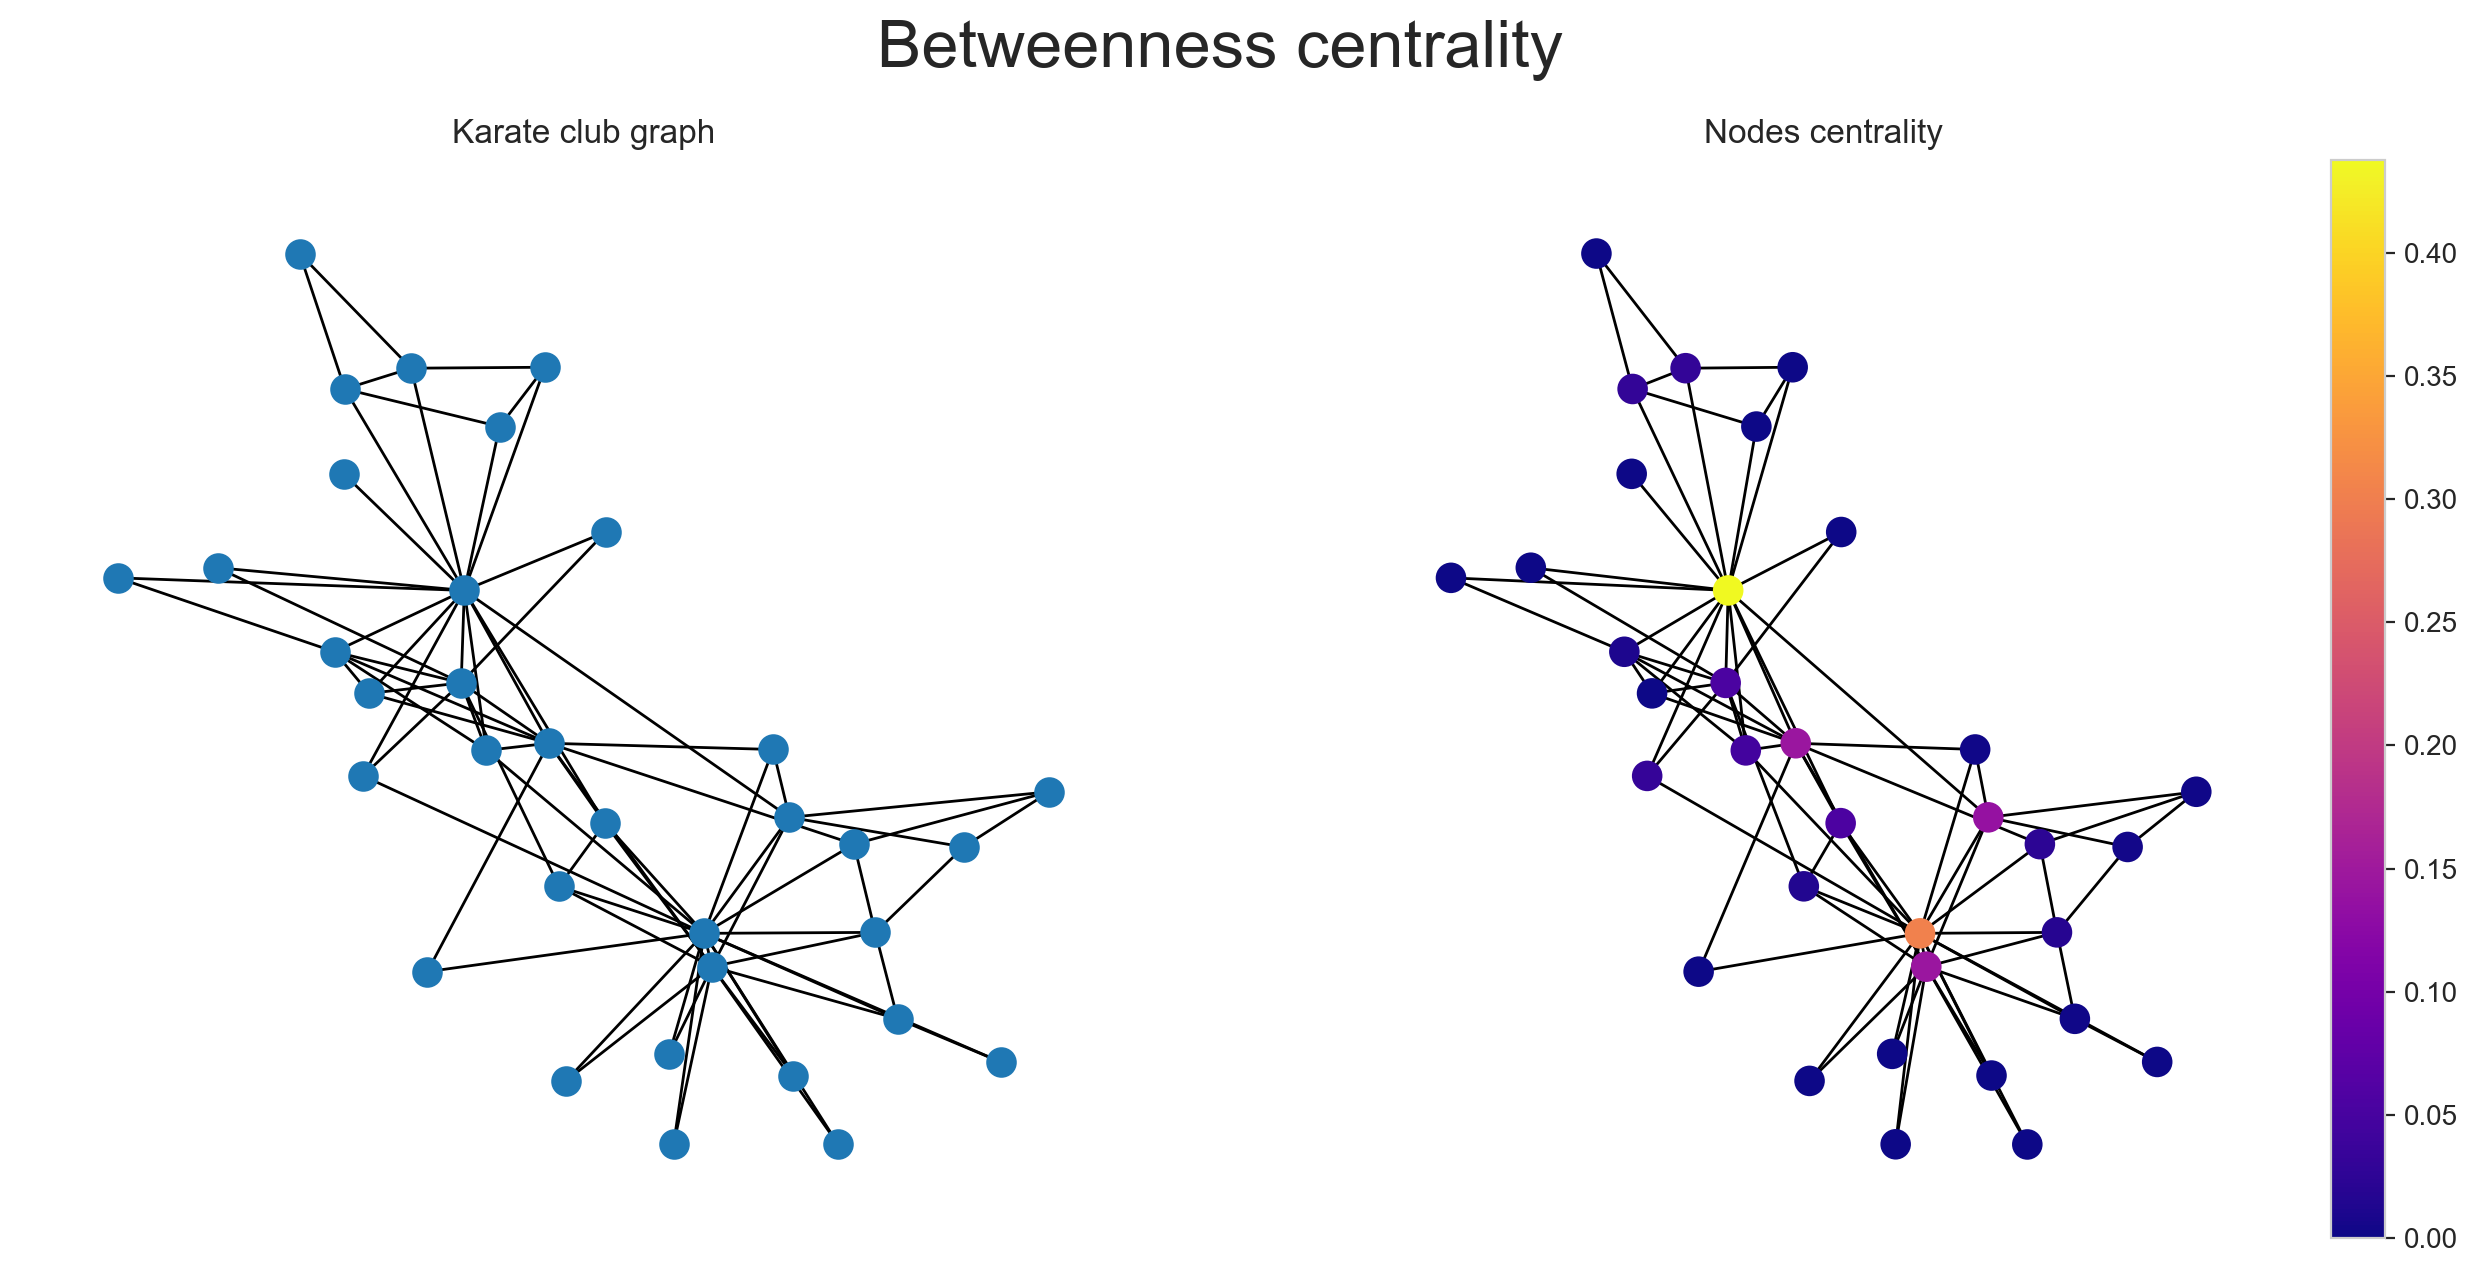

In [45]:
betweenness_centrality = nx.betweenness_centrality(G)
draw(G, betweenness_centrality, 'Betweenness centrality')
plt.savefig('figures/betweenness-centrality.png', dpi=300)

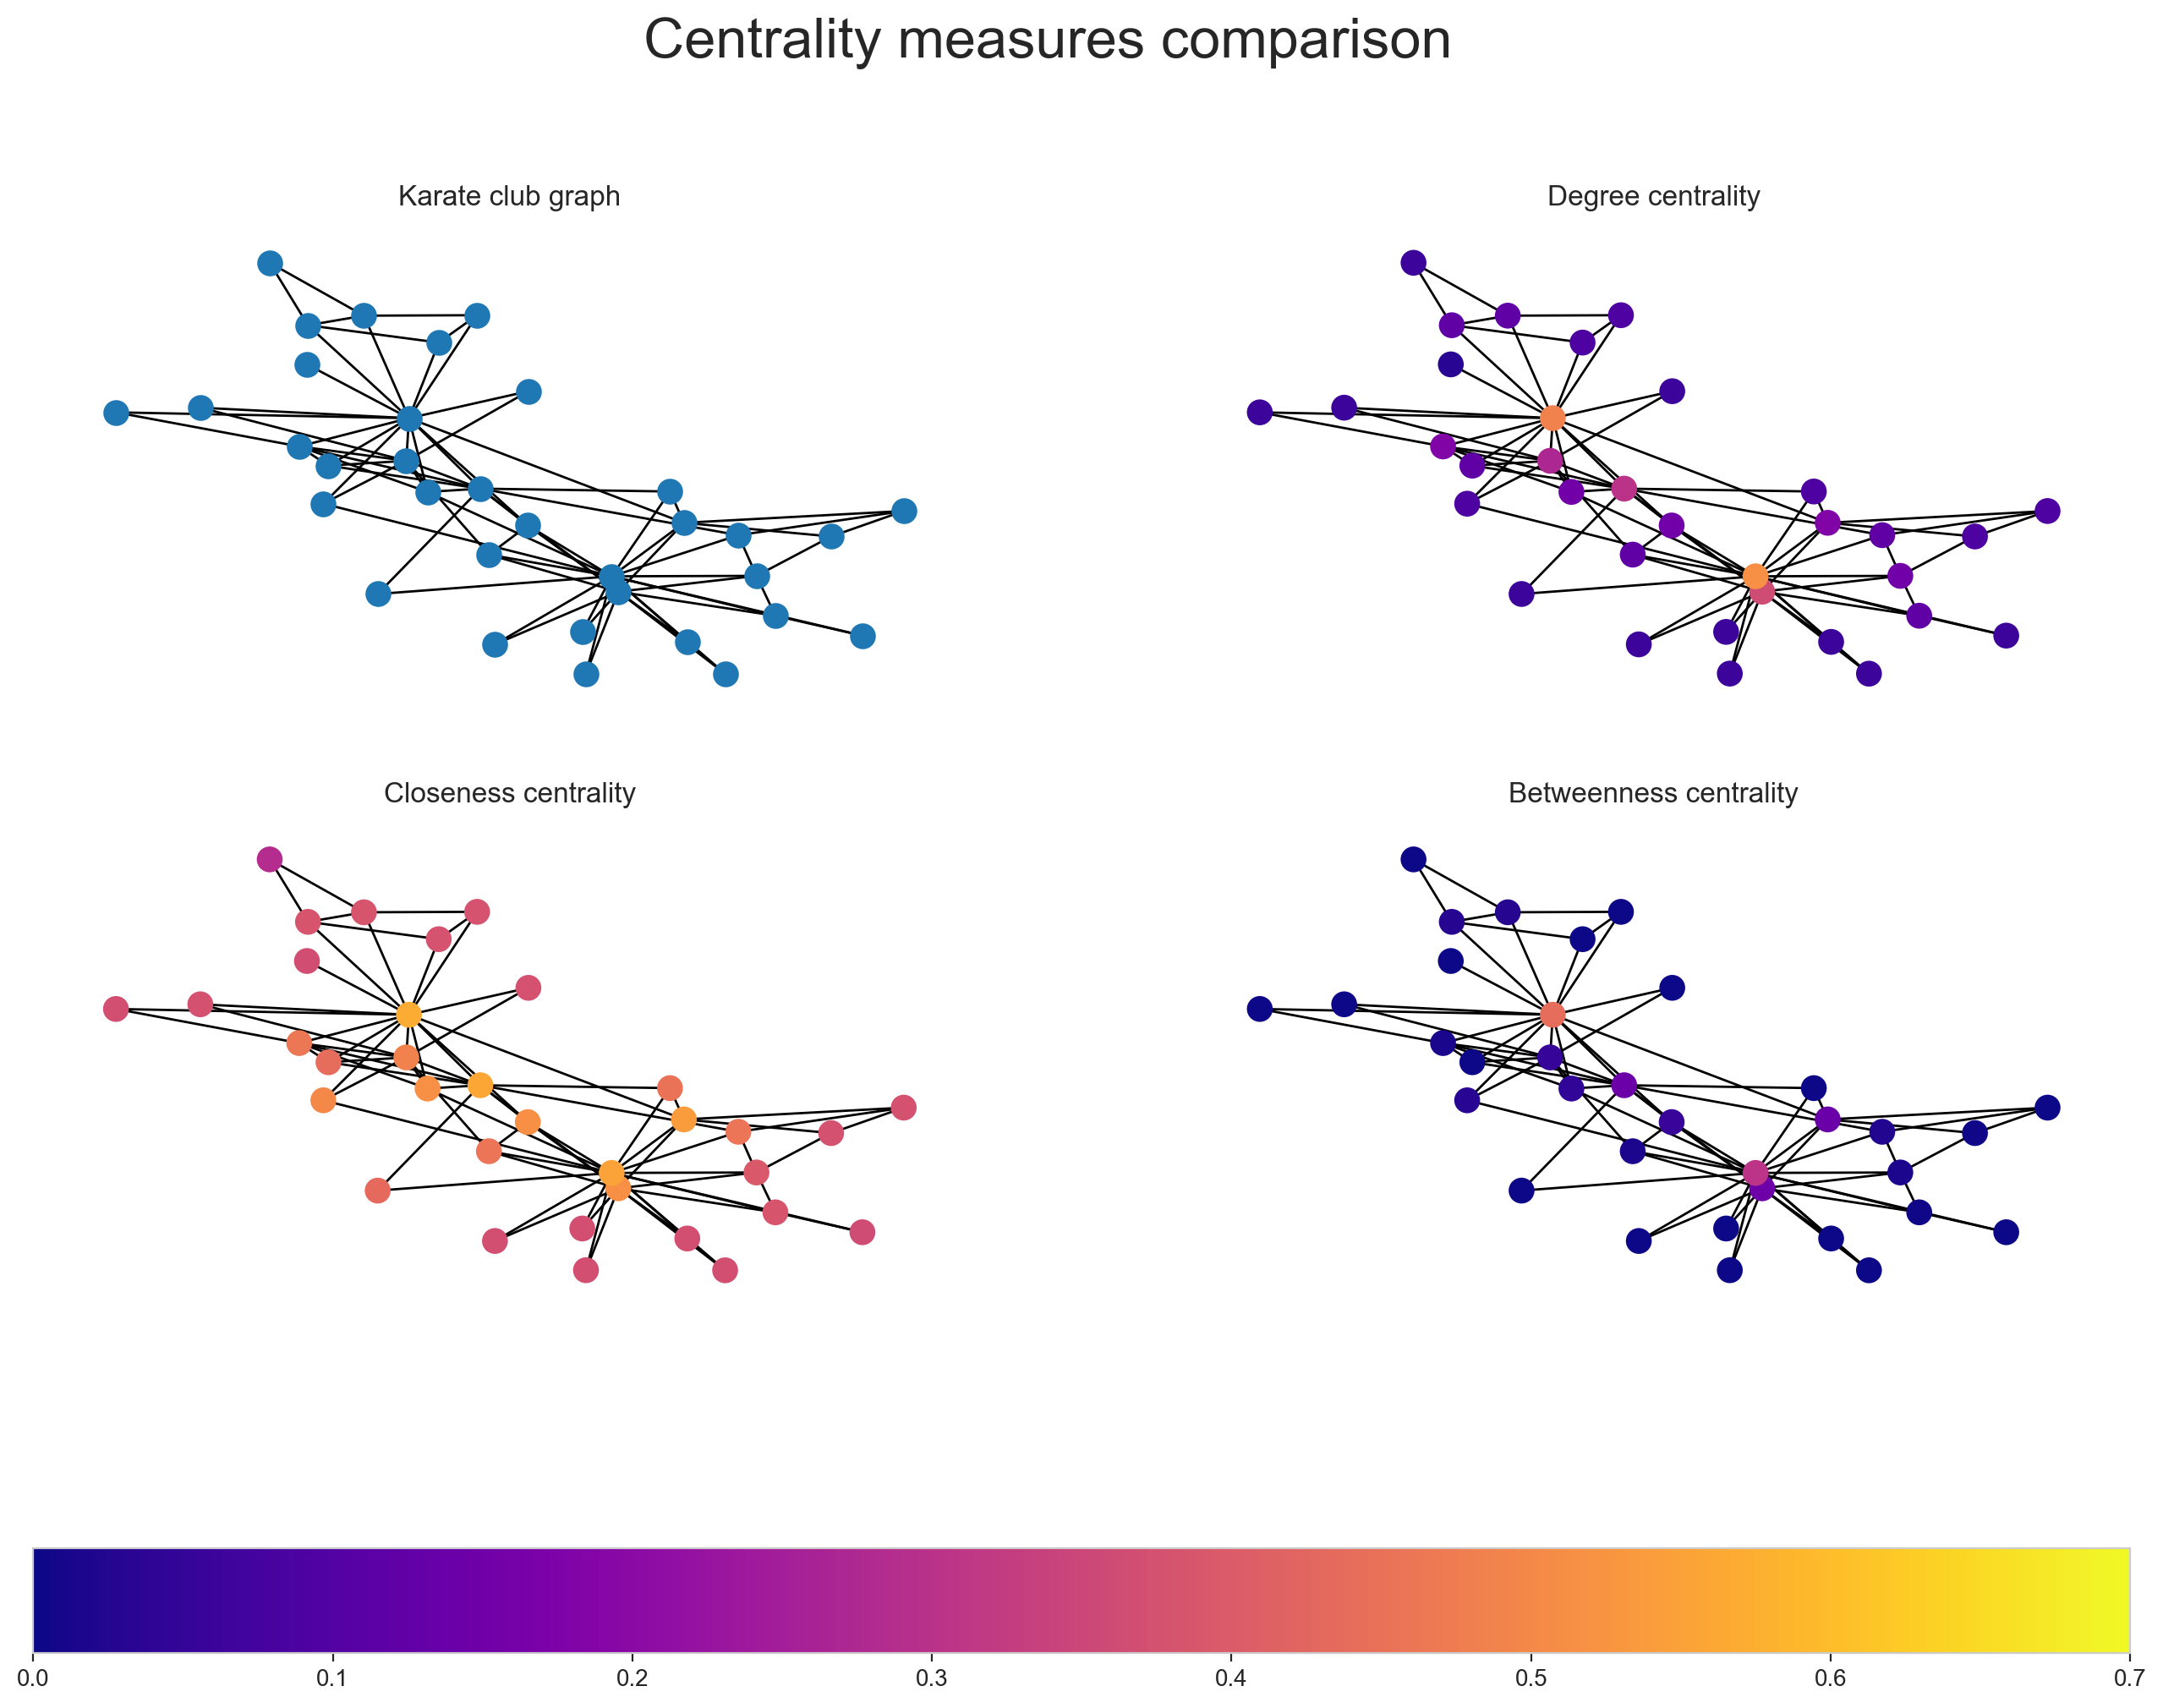

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2)
pos = nx.spring_layout(G, seed=40)

ax = ax.flatten()

nodes = nx.draw_networkx_nodes(G, pos, node_size=100,
                               ax=ax[0])
nx.draw_networkx_edges(G, pos, ax=ax[0])
ax[0].axis('off')
ax[0].set_title('Karate club graph')

for i, (measure_name, measure) in enumerate(zip(['Degree centrality', 'Closeness centrality', 'Betweenness centrality'], [degree_centrality, closeness_centrality, betweenness_centrality])):
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma,
                                   node_color=list(measure.values()),
                                   nodelist=measure.keys(),
                                   ax=ax[i+1])
    nodes.set_norm(mcolors.Normalize(vmin=0, vmax=0.7))
    nx.draw_networkx_edges(G, pos, ax=ax[i+1])
    ax[i+1].axis('off')
    ax[i+1].set_title(measure_name)

fig.colorbar(nodes, orientation='horizontal', ax=ax)
fig.suptitle('Centrality measures comparison', fontsize=24)
fig.set_size_inches(16, 12)
plt.savefig('figures/centrality-comparison.png', dpi=300)

In [2]:
import osmnx as ox
import networkx as nx

In [19]:
K = ox.graph_from_place("Kraków, Grzegórzki", simplify=False, network_type="drive")

/Users/thmtt/opt/anaconda3/envs/cities-osmnx/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/thmtt/opt/anaconda3/envs/cities-osmnx/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thmtt/opt/anaconda3/envs/cities-osmnx/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/thmtt/opt/anaconda3/envs/cities-osmnx/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thmtt/opt/anaconda3/envs/cities-osmnx/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


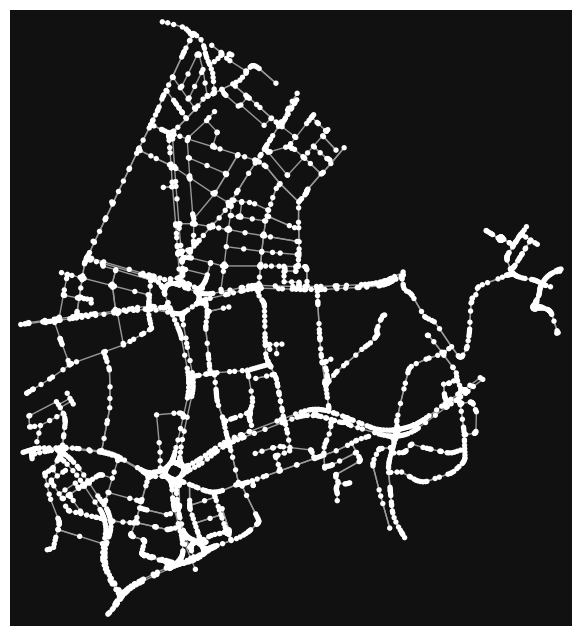

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [20]:
ox.plot_graph(K)

In [21]:
len(K.nodes)

2847

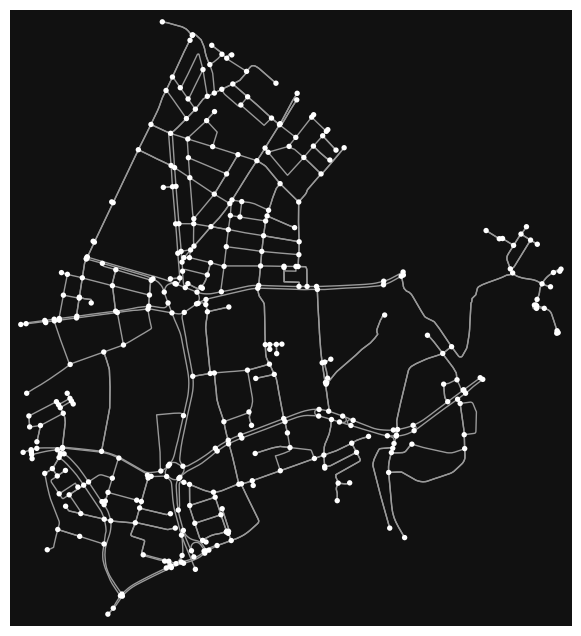

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [22]:
K_simple = ox.simplify_graph(K)
ox.plot_graph(K_simple)

In [13]:
len(K.nodes)

13224

In [23]:
ox.plot_graph_folium(K_simple)

/Users/thmtt/opt/anaconda3/envs/cities-osmnx/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)
